# Import and show head and info

In [19]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("../Data/EE.csv")
display(df.head(1))
# display(df.info())

,drawNumber,drawDate,drawDateTime,drawName,drawSize,drawCRS,drawText2,drawCutOff,drawDistributionAsOn,dd1,...,dd9,dd10,dd11,dd12,dd13,dd14,dd15,dd16,dd17,dd18
0,368,2025-09-18,"September 18, 2025 at 13:53:39 UTC",Trade occupations (Version 2),"1,250",505,"Federal Skilled Worker Program, Canadian Exper...","November 05, 2024 at 22:36:09 UTC","September 14, 2025",220,...,"74,178","14,719","16,312","14,822","14,714","13,611","52,883","19,978","8,074","251,630"


# As noticed, there are some missing data on drawCutOff.

In [2]:
missing_draw_cutoff = df[df['drawCutOff'].isnull()]
print(len(missing_draw_cutoff), "missing drawCutOff values to keep in mind")
# display(missing_draw_cutoff)  

76 missing drawCutOff values to keep in mind


# Change of data types

## drawNumber to int

In [ ]:
print(df['drawNumber'].dtype)
# df['drawNumber'] = df['drawNumber'].astype(int) ERROR

object


There is a problem with the conversion.
This is because there are two draw Numbers that are alphanumeric: 91a and 91b

In [4]:
display(df[df['drawNumber'].isin(['91a', '91b'])])

,drawNumber,drawDate,drawDateTime,drawName,drawSize,drawCRS,drawText2,drawCutOff,drawDistributionAsOn,dd1,...,dd9,dd10,dd11,dd12,dd13,dd14,dd15,dd16,dd17,dd18
277,91a,2018-05-30,"May 30, 2018 at 14:52:06 UTC",Federal Skilled Trades,500,288,Federal Skilled Trades,"June 7, 2017 at 20:11:13 UTC","May 30, 2018",0,...,0,0,0,0,0,0,0,0,0,0
278,91b,2018-05-30,"May 30, 2018 at 14:52:06 UTC",Provincial Nominee Program,200,902,Provincial Nominee Program,"March 23, 2018 at 05:38:02 UTC","May 30, 2018",0,...,0,0,0,0,0,0,0,0,0,0


## drawDate to datetime

In [5]:
print(df['drawDate'].dtype)
df['drawDate'] = pd.to_datetime(df['drawDate'])
print(df['drawDate'].dtype)

object
datetime64[ns]


## drawSize to int

In [6]:
print(df['drawSize'].dtype)
df['drawSize'] = df['drawSize'].replace({',': ''}, regex=True).astype(int)
print(df['drawSize'].dtype)

object
int32


## drawCRS to int

In [ ]:
print(df['drawCRS'].dtype)

int64


# Describe

In [7]:
print(df.describe())

                            drawDate      drawSize     drawCRS
count                            369    369.000000  369.000000
mean   2021-01-29 23:48:17.560975616   2354.463415  531.409214
min              2015-01-31 00:00:00    118.000000   75.000000
25%              2018-06-13 00:00:00    762.000000  446.000000
50%              2021-04-28 00:00:00   1800.000000  475.000000
75%              2023-12-19 00:00:00   3600.000000  663.000000
max              2025-09-18 00:00:00  27332.000000  902.000000
std                              NaN   2108.551682  134.823931


In [8]:
print("The earliest draw date is", df['drawDate'].min())
print("The latest draw date is", df['drawDate'].max())

print(" ")
print("The highest draw size is", df['drawSize'].max())
print("The average draw size is {:.2f}".format(df['drawSize'].mean()))
print("The lowest draw size is", df['drawSize'].min())
print("The coeficient of variation for draw size is {:.2f}%".format((df['drawSize'].std() / df['drawSize'].mean()) * 100))

print(" ")
print("The highest Score is ", df['drawCRS'].max())
print("The average Score is {:.2f}".format(df['drawCRS'].mean()))
print("The lowest Score is ", df['drawCRS'].min())
print("The coeficient of variation for Score is {:.2f}%".format((df['drawCRS'].std() / df['drawCRS'].mean()) * 100))

The earliest draw date is 2015-01-31 00:00:00
The latest draw date is 2025-09-18 00:00:00
 
The highest draw size is 27332
The average draw size is 2354.46
The lowest draw size is 118
The coeficient of variation for draw size is 89.56%
 
The highest Score is  902
The average Score is 531.41
The lowest Score is  75
The coeficient of variation for Score is 25.37%


Key takeouts:
- The draw sizes have a very high variation, they are very spreaded out values
- The scores are not as chaotic but a just a bit spreaded

In [9]:
print(df['drawName'].value_counts())  # draw type frequency

drawName
No Program Specified                                      167
Provincial Nominee Program                                 88
Canadian Experience Class                                  47
French language proficiency (Version 1)                    22
General                                                    11
Federal Skilled Trades                                      7
Healthcare occupations (Version 1)                          6
Healthcare and social services occupations (Version 2)      4
Trade occupations (Version 1)                               4
STEM occupations (Version 1)                                3
Transport occupations (Version 1)                           3
Agriculture and agri-food occupations (Version 1)           3
Education occupations (Version 1)                           2
Trade occupations (Version 2)                               1
Federal Skilled Worker                                      1
Name: count, dtype: int64


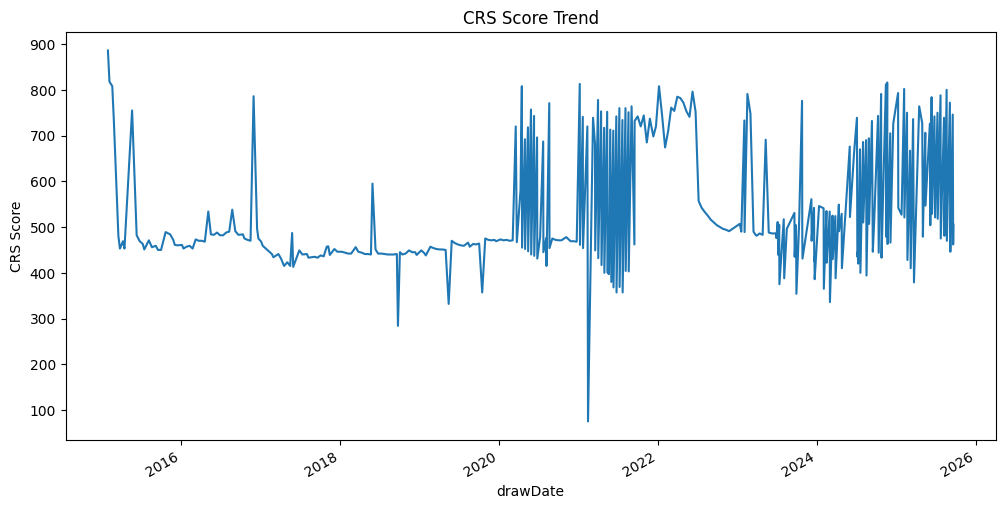

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # width=12, height=6 inches
df.groupby('drawDate')['drawCRS'].mean().plot(marker='')
plt.title('CRS Score Trend')
plt.ylabel('CRS Score')
plt.show()


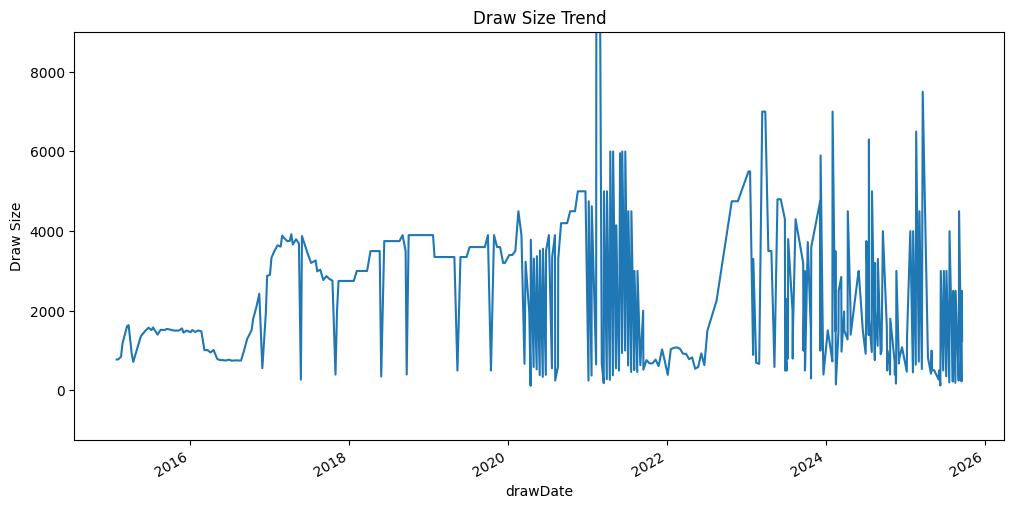

In [11]:
plt.figure(figsize=(12, 6))  # width=12, height=6 inches
# df.info()
df.groupby('drawDate')['drawSize'].mean().plot(marker='')
plt.title('Draw Size Trend')
plt.ylabel('Draw Size')
plt.ylim(top=9000)  # set the top limit
plt.show()

In [12]:
# Means of Scores per program
df.groupby('drawName')['drawCRS'].mean().sort_values()

drawName
Federal Skilled Trades                                    302.285714
Agriculture and agri-food occupations (Version 1)         392.333333
Trade occupations (Version 1)                             420.500000
French language proficiency (Version 1)                   425.818182
Transport occupations (Version 1)                         433.333333
Healthcare occupations (Version 1)                        450.000000
Canadian Experience Class                                 465.851064
Education occupations (Version 1)                         470.500000
No Program Specified                                      474.425150
STEM occupations (Version 1)                              486.000000
Federal Skilled Worker                                    489.000000
Healthcare and social services occupations (Version 2)    489.750000
Trade occupations (Version 2)                             505.000000
General                                                   539.000000
Provincial Nominee Progra

In [13]:
# Total Number of historical invitations per program
df.groupby('drawName')['drawSize'].sum().sort_values()

drawName
Agriculture and agri-food occupations (Version 1)           1150
Trade occupations (Version 2)                               1250
Transport occupations (Version 1)                           2645
Federal Skilled Trades                                      3055
Federal Skilled Worker                                      3300
Education occupations (Version 1)                           3500
Trade occupations (Version 1)                               6100
Healthcare and social services occupations (Version 2)      7500
STEM occupations (Version 1)                               10900
Healthcare occupations (Version 1)                         15850
General                                                    20520
French language proficiency (Version 1)                    57200
Provincial Nominee Program                                 58163
Canadian Experience Class                                 182067
No Program Specified                                      495597
Name: drawSize, 

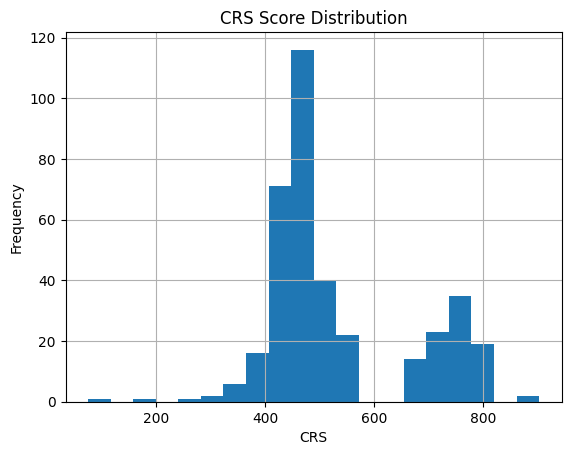

In [14]:
df['drawCRS'].hist(bins=20)
plt.title('CRS Score Distribution')
plt.xlabel('CRS')
plt.ylabel('Frequency')
plt.show()

In [15]:
recent = df[df['drawDate'] >= '2025-01-01']
past = df[df['drawDate'] < '2025-01-01']

print(recent['drawCRS'].mean(), past['drawCRS'].mean())

608.2631578947369 522.5861027190332


In [16]:
df.groupby('drawName').agg({'drawCRS': ['mean', 'min', 'max'], 'drawSize': ['mean','min', 'max','sum']})

drawCRS            \
                                                          mean  min  max   
drawName                                                                   
Agriculture and agri-food occupations (Version 1)   392.333333  354  437   
Canadian Experience Class                           465.851064   75  808   
Education occupations (Version 1)                   470.500000  462  479   
Federal Skilled Trades                              302.285714  199  415   
Federal Skilled Worker                              489.000000  489  489   
French language proficiency (Version 1)             425.818182  336  486   
General                                             539.000000  524  561   
Healthcare and social services occupations (Ver...  489.750000  470  510   
Healthcare occupations (Version 1)                  450.000000  422  476   
No Program Specified                                474.425150  413  886   
Provincial Nominee Program                          742.522727  663  902   
STEM occupations (Version 1)                        486.000000  481  491   
Trade occupations (Version 1)                       420.500000  388  436   
Trade occupations (Version 2)                       505.000000  505  505   
Transport occupations (Version 1)                   433.333333  430  435   

                                                       drawSize               \
                                                           mean   min    max   
drawName                                                                       
Agriculture and agri-food occupations (Version 1)    383.333333   150    600   
Canadian Experience Class                           3873.765957   400  27332   
Education occupations (Version 1)                   1750.000000  1000   2500   
Federal Skilled Trades                               436.428571   250    505   
Federal Skilled Worker                              3300.000000  3300   3300   
French language proficiency (Version 1)             2600.000000   300   7500   
General                                             1865.454545   730   4750   
Healthcare and social services occupations (Ver...  1875.000000   500   4000   
Healthcare occupations (Version 1)                  2641.666667   500   3750   
No Program Specified                                2967.646707   700   7000   
Provincial Nominee Program                           660.943182   118   2985   
STEM occupations (Version 1)                        3633.333333   500   5900   
Trade occupations (Version 1)                       1525.000000  1000   1800   
Trade occupations (Version 2)                       1250.000000  1250   1250   
Transport occupations (Version 1)                    881.666667   670   1000   

                                                            
                                                       sum  
drawName                                                    
Agriculture and agri-food occupations (Version 1)     1150  
Canadian Experience Class                           182067  
Education occupations (Version 1)                     3500  
Federal Skilled Trades                                3055  
Federal Skilled Worker                                3300  
French language proficiency (Version 1)              57200  
General                                              20520  
Healthcare and social services occupations (Ver...    7500  
Healthcare occupations (Version 1)                   15850  
No Program Specified                                495597  
Provincial Nominee Program                           58163  
STEM occupations (Version 1)                         10900  
Trade occupations (Version 1)                         6100  
Trade occupations (Version 2)                         1250  
Transport occupations (Version 1)                     2645